# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

**Connecting to Drive**

In [1]:
#connecting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing libraries**

In [2]:
#libraries required for exploratory analysis
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import missingno as msno
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor

**Loading the dataset**

In [3]:
#loading the dataset from drive
sales_df = pd.read_csv('/content/drive/MyDrive/Rossmann/Rossmann Stores Data.csv')
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
sales_df.shape

(1017209, 9)

In [5]:
#number of unique values in the whole dataset
sales_df.nunique()

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64

#**Data Cleaning**

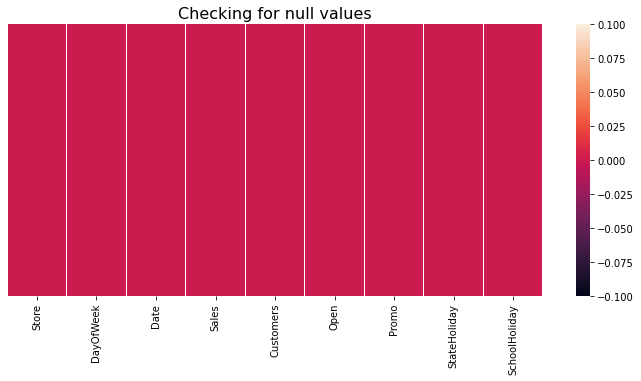

In [6]:
#Checking for null values
plt.figure(figsize=(12,5))
sns.heatmap(sales_df.isnull(), yticklabels=False)
plt.title('Checking for null values', size=16)
plt.show()

* The above figure shows that there are no NaN values in the dataset

**Coverting the date time feature**

In [7]:
#changing the format of datetime
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
#creating some additional columns
sales_df['Year'] = sales_df['Date'].dt.year
sales_df['Month'] = sales_df['Date'].dt.month
sales_df['Day'] = sales_df['Date'].dt.day

* column containing datetime was converted and made saperate columns for date, month and year

In [8]:
#data frame after adding the columns
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31


In [9]:
#information of the dataset showing the datatypes of features
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 12 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
 9   Year           1017209 non-null  int64         
 10  Month          1017209 non-null  int64         
 11  Day            1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 93.1+ MB


#**Exploratory Analysis**

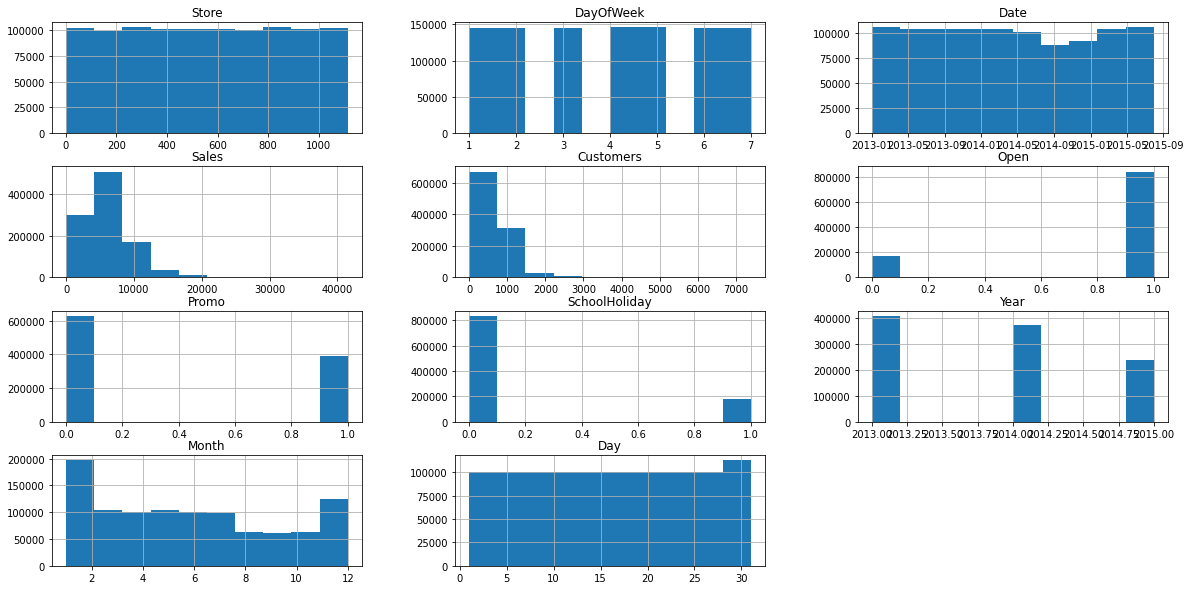

In [10]:
#plotting the given dataset on histogram
sales_df.hist(figsize=(20,10))
plt.show()

* The histplot showing the density and scatterness of each column in the dataset

**Description of the sales data**

In [11]:
#description of the dataset
sales_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0
Year,1017209.0,2013.832292,0.777396,2013.0,2013.0,2014.0,2014.0,2015.0
Month,1017209.0,5.846762,3.326097,1.0,3.0,6.0,8.0,12.0
Day,1017209.0,15.702790,8.787638,1.0,8.0,16.0,23.0,31.0


* Table showing the mathematical functions on numerical features

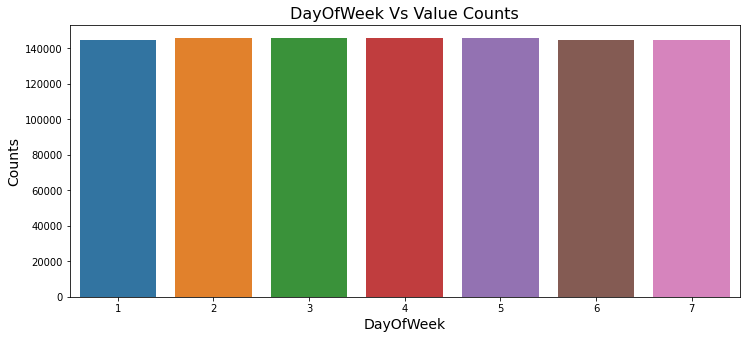

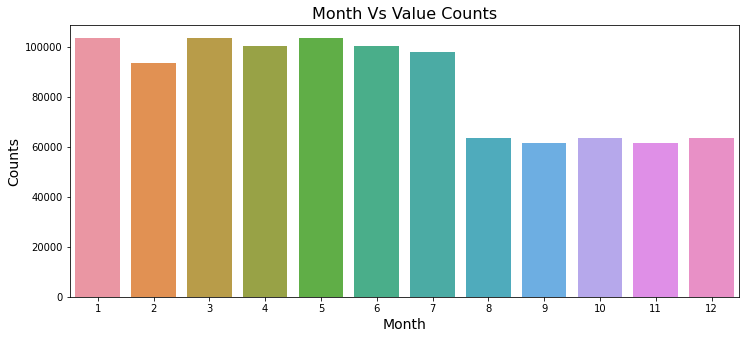

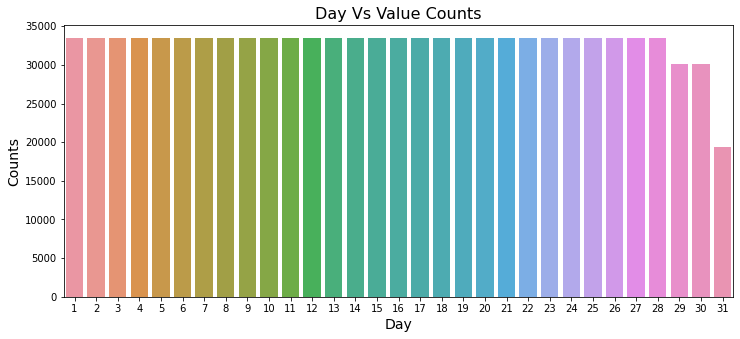

In [12]:
#selecting some features and making a saperate list
features = ['DayOfWeek', 'Month', 'Day']

#visualization of valuecounts
for col in features:
    fig = plt.figure(figsize=(12,5))
    ax = fig.gca()
    sns.countplot(sales_df[col], ax=ax)
    plt.title(f'{col} Vs Value Counts', size=16)
    plt.ylabel('Counts', size=14)
    plt.xlabel(col, size=14)
    plt.show()

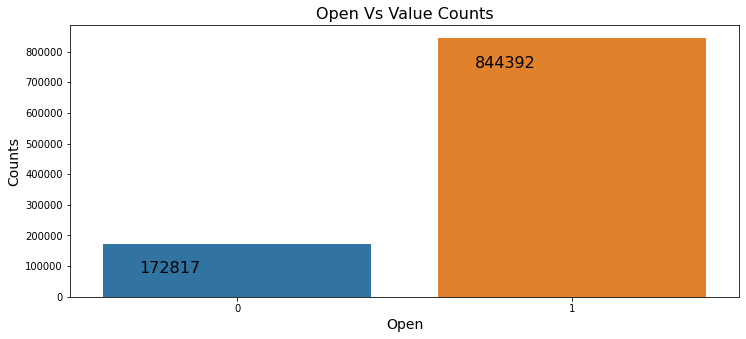

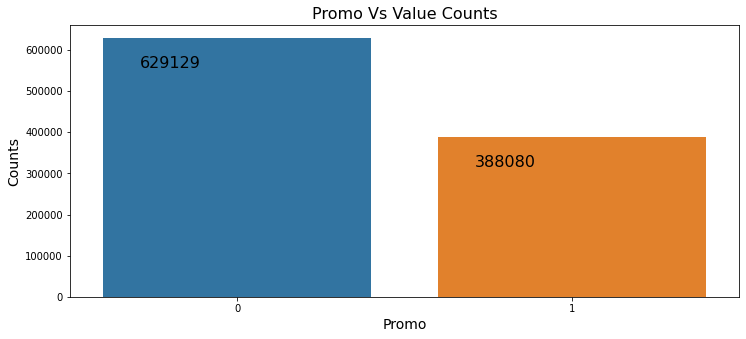

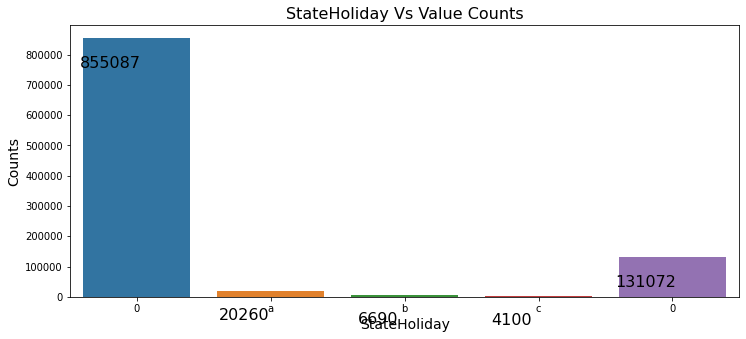

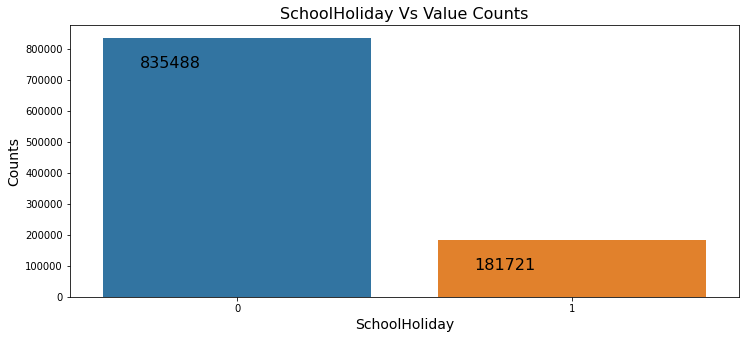

In [13]:
features = ['Open', 'Promo', 'StateHoliday', 'SchoolHoliday']

#visualization of valuecounts
for col in features:
    fig = plt.figure(figsize=(12,5))
    ax = fig.gca()
    ch = sns.countplot(sales_df[col], ax=ax)
    plt.title(f'{col} Vs Value Counts', size=16)
    plt.ylabel('Counts', size=14)
    plt.xlabel(col, size=14)
    for p in ch.patches:
      ch.annotate(f'\n{p.get_height()}',  (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)

    plt.show()

**Day of Week Vs Open**

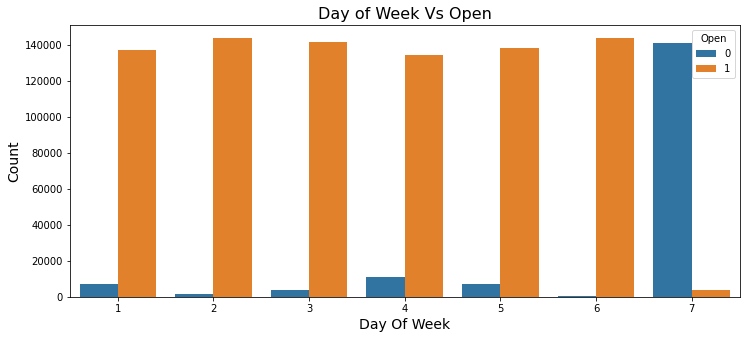

In [14]:
#plotting of day of week vs open and close of stores
plt.figure(figsize=(12,5))
sns.countplot(x='DayOfWeek', hue='Open', data=sales_df)
plt.title('Day of Week Vs Open', size=16)
plt.xlabel('Day Of Week', size=14)
plt.ylabel('Count', size=14)
plt.show()

* The countplot shows the stores opened and closed during different days in the week

**Sate Holiday Vs Open**

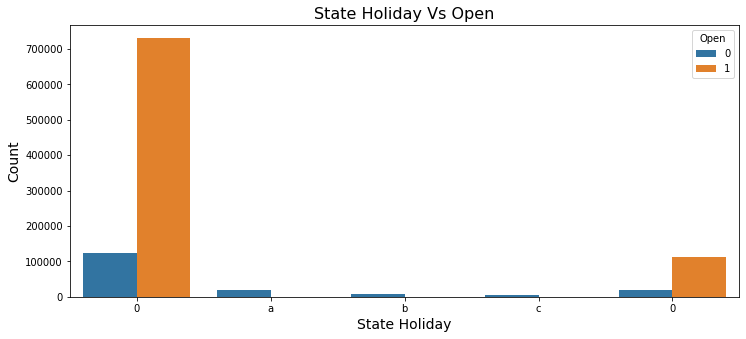

In [15]:
#plotting of state holiday vs open and close of stores
plt.figure(figsize=(12,5))
sns.countplot(x='StateHoliday', hue='Open', data=sales_df)
plt.title('State Holiday Vs Open', size=16)
plt.xlabel('State Holiday', size=14)
plt.ylabel('Count', size=14)
plt.show()

* The countplot shows the stores opened and closed during state holidays

**Promo Vs Open**

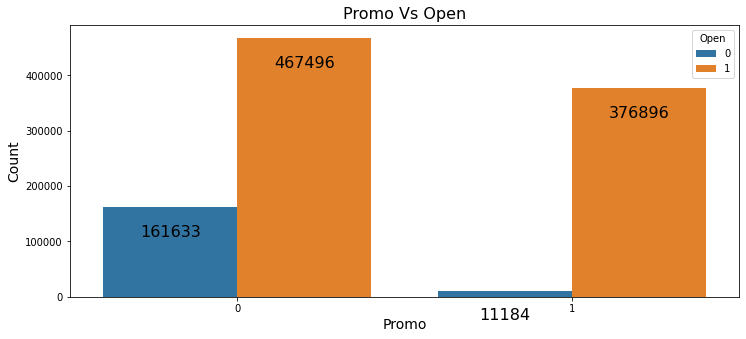

In [16]:
#plotting of Promo days vs open and close of stores
plt.figure(figsize=(12,5))
ax = sns.countplot(x='Promo', hue='Open', data=sales_df)
plt.title('Promo Vs Open', size=16)
plt.xlabel('Promo', size=14)
plt.ylabel('Count', size=14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',  (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)

plt.show()

* The figure shows that during promo days also some of the stores are closed

* It is assumed that these promo days are included in some of the holidays

**Customers Vs Sales**

<Figure size 864x360 with 0 Axes>

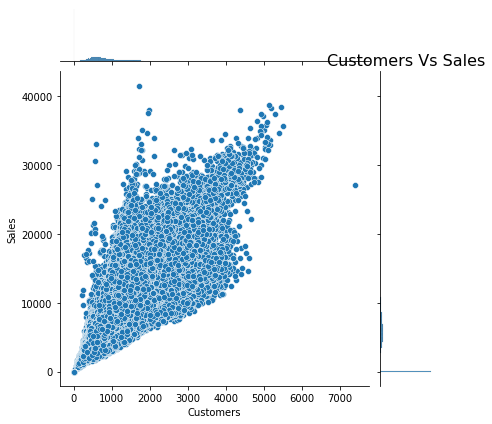

In [17]:
#jointplot of customers and sales of stores
plt.figure(figsize=(12,5))
sns.jointplot(x='Customers', y='Sales', data=sales_df)
plt.title('Customers Vs Sales', size=16)
plt.xlabel('Customers', size=14)
plt.ylabel('Sales', size=14)
plt.show()


*	Sales are highly correlated with the customers.

* It shows we have more customers in the range of 0 to 10000 with sales range of 0 to 2000

**Analysis of Sales**

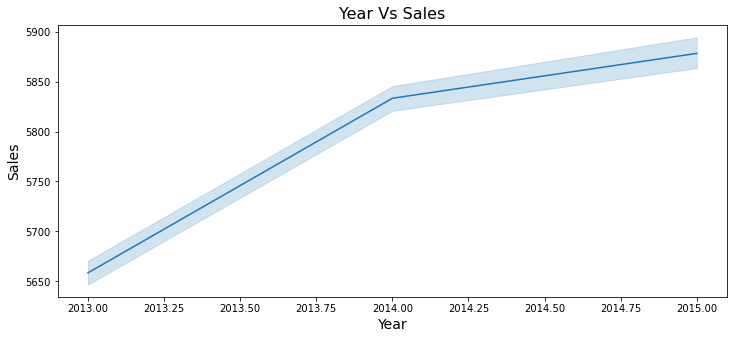

In [18]:
#visualization of year and sales
plt.figure(figsize=(12,5))
sns.lineplot(x='Year', y='Sales', data=sales_df)
plt.title('Year Vs Sales', size=16)
plt.xlabel('Year', size=14)
plt.ylabel('Sales', size=14)
plt.show()

* The lineplot shoes there is increase in sales of the stores on year by year.

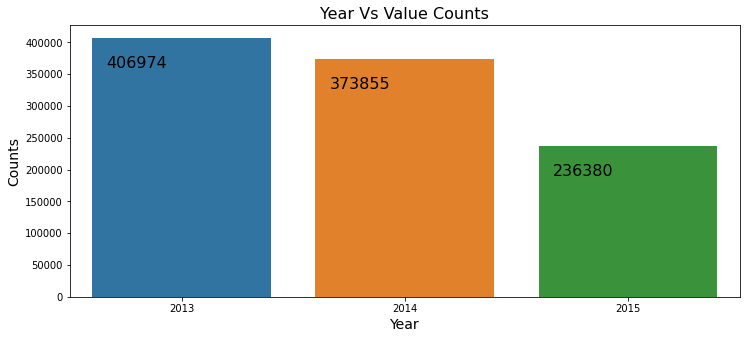

In [19]:
#Year and its vlues counts
plt.figure(figsize=(12,5))
ax = sns.countplot(sales_df['Year'])
plt.title('Year Vs Value Counts', size=16)
plt.ylabel('Counts', size=14)
plt.xlabel('Year', size=14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',  (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)
plt.show()

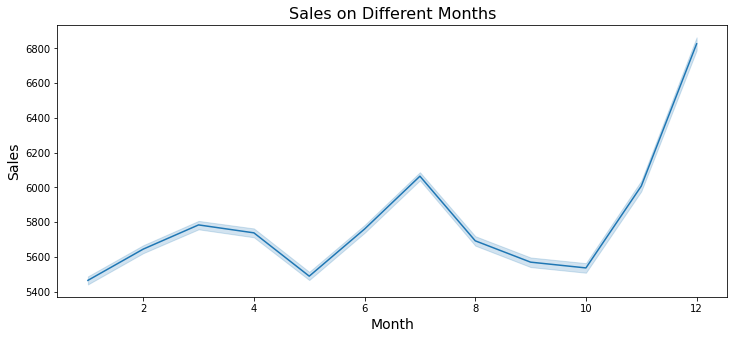

In [20]:
#plotting the data of Sales Behavior on Different Months
plt.figure(figsize=(12,5))
sns.lineplot(x='Month', y='Sales', data=sales_df)
plt.title('Sales on Different Months', size=16)
plt.xlabel('Month', size=14)
plt.ylabel('Sales', size=14)
plt.show()

* Above lineplot shows the data distribution of sales in different months

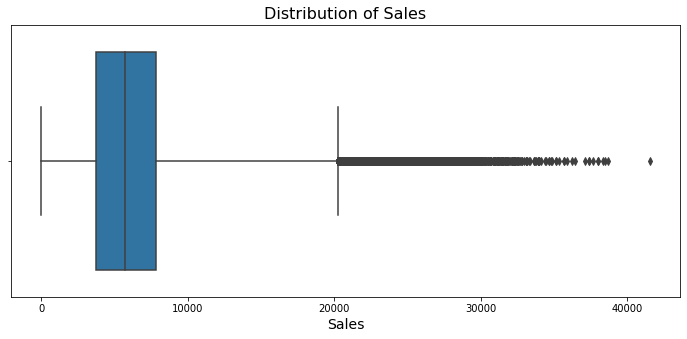

In [21]:
#boxplot of sales variable
plt.figure(figsize=(12,5))
sns.boxplot(sales_df['Sales'], whis=3)
plt.title('Distribution of Sales', size=16)
plt.xlabel('Sales', size=14)
plt.show()

In [22]:
sales_df = sales_df[sales_df['Sales'] > 0]
sales_df = sales_df[sales_df['Sales'] < 25000]

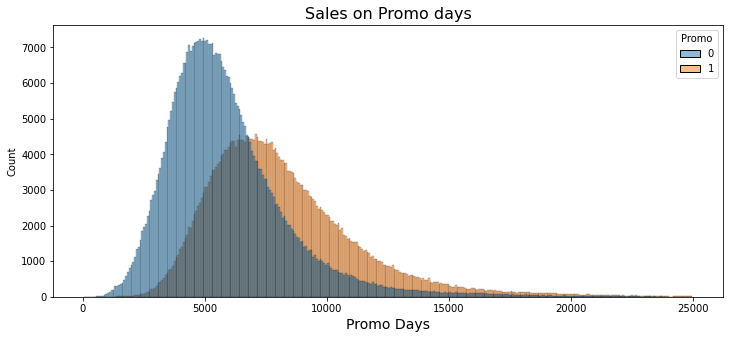

In [23]:
#plotting the data of sales on promo days
plt.figure(figsize=(12,5))
sns.histplot(hue='Promo', x='Sales', data=sales_df)
plt.title('Sales on Promo days', size=16)
plt.xlabel('Promo Days', size=14)
plt.show()

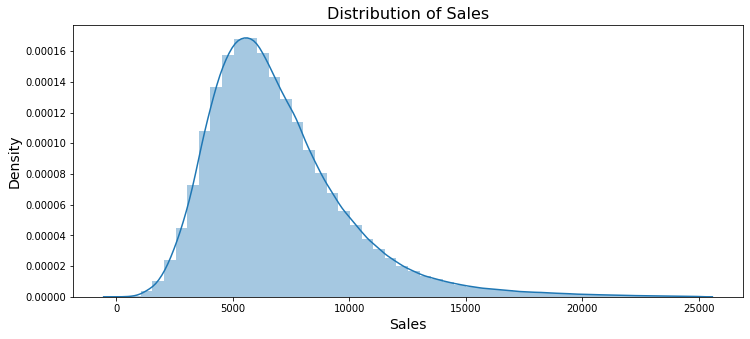

In [24]:
#distribution of sales
plt.figure(figsize=(12,5))
sns.distplot(sales_df['Sales'])
plt.title('Distribution of Sales', size=16)
plt.xlabel('Sales', size=14)
plt.ylabel('Density', size=14)
plt.show()

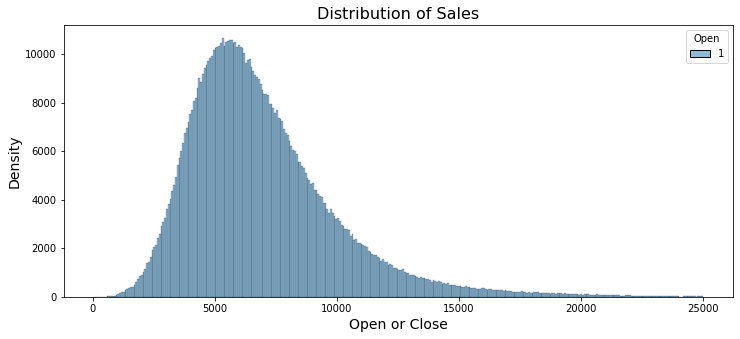

In [25]:
#Sales on Open and close days
plt.figure(figsize=(12,5))
sns.histplot(x='Sales', hue='Open', data=sales_df)
plt.title('Distribution of Sales', size=16)
plt.xlabel('Open or Close', size=14)
plt.ylabel('Density', size=14)
plt.show()

**Year Vs Stores Open days**

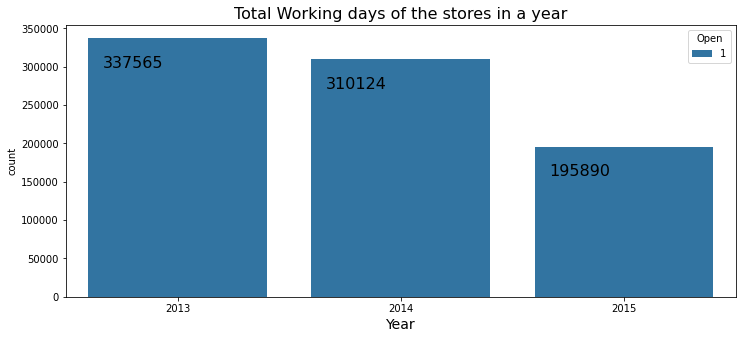

In [26]:
#total working days of the stores
plt.figure(figsize=(12,5))
ax = sns.countplot(x='Year', hue='Open', data=sales_df)
plt.title('Total Working days of the stores in a year', size=16)
plt.xlabel('Year', size=14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',  (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)

plt.show()

* We have more working days and holidays in 2013 and less in 2015

**Customers Vs Day of week**

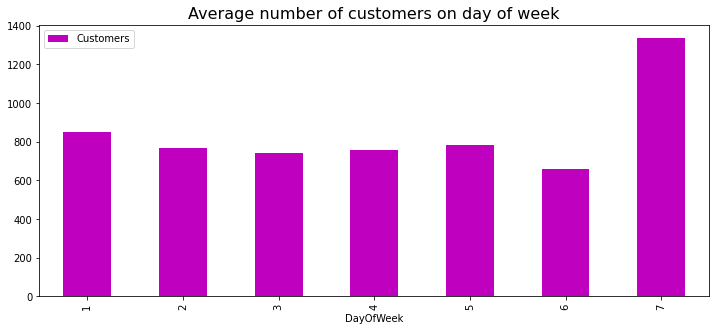

In [27]:
#finding the average customers during wvwry day of week
avg_customers = sales_df.groupby(['DayOfWeek']).agg({'Customers':'mean'})

#plotting the data of average number of customers visits in a day
avg_customers.plot(kind='bar', figsize=(12,5), color='m')
plt.title('Average number of customers on day of week', size=16)

plt.show()

* It is assumed that 7 as sunday and we have less customer visits on sundays

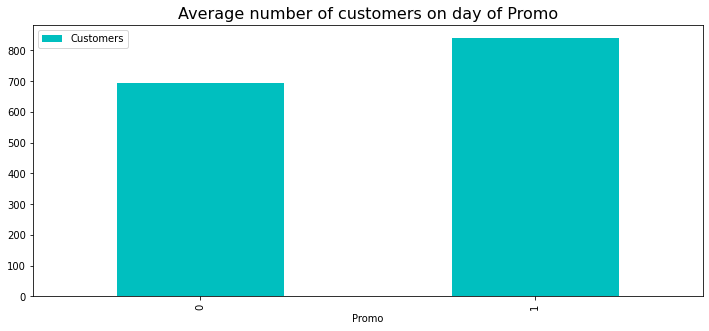

In [28]:
#finding the average customers during promo days
promo_sales = sales_df.groupby(['Promo']).agg({'Customers':'mean'})

#plotting the data of average number of customers visits in promo sale days
promo_sales.plot(kind='bar', figsize=(12,5), color='c')
plt.title('Average number of customers on day of Promo', size=16)

plt.show()

**15 Stores with Hight Sales**

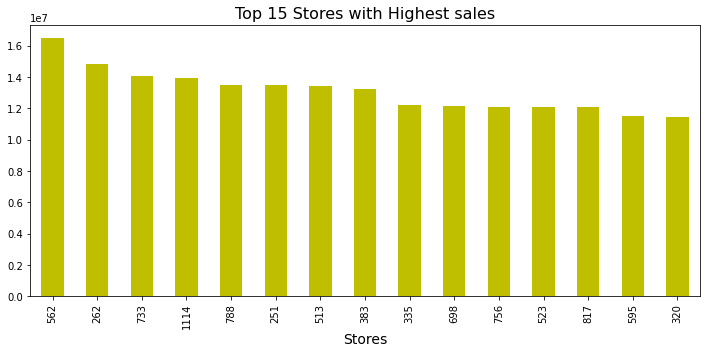

In [29]:
#finding the stores with their sales
stores = sales_df.groupby('Store')['Sales'].sum().sort_values(ascending=False)

#plotting the top 15 stores data
top_stores = stores.head(15)
top_stores.plot(kind='bar', figsize=(12,5), color='y')
plt.title('Top 15 Stores with Highest sales', size=16)
plt.xlabel('Stores', size=14)
plt.show()

**15 Least performing stores**

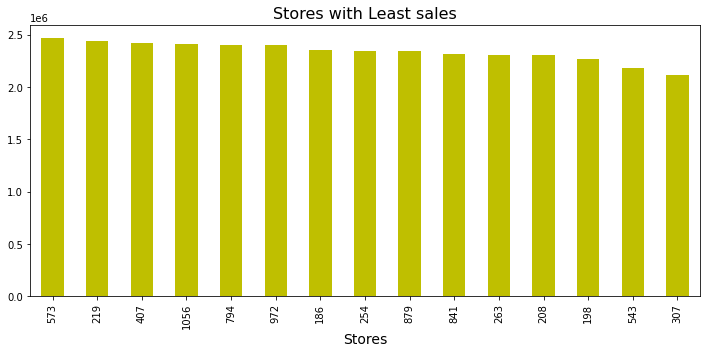

In [30]:
#plotting the top 15 stores data
least_stores = stores.tail(15)
least_stores.plot(kind='bar', figsize=(12,5), color='y')
plt.title('Stores with Least sales', size=16)
plt.xlabel('Stores', size=14)
plt.show()

**Stores with more customers**

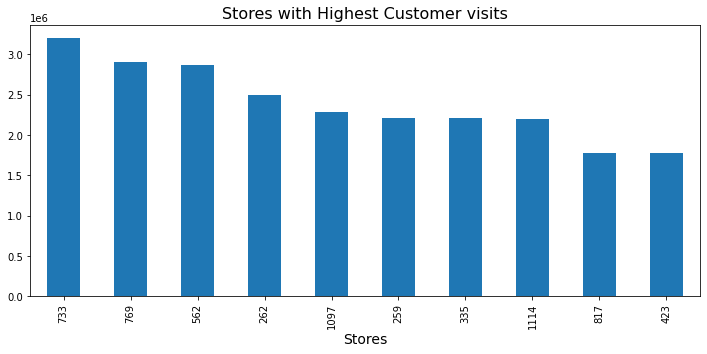

In [31]:
#finding the stores with more customers
cust_stores = sales_df.groupby('Store')['Customers'].sum().sort_values(ascending=False)

#plotting the top 15 stores data
top_stores = cust_stores.head(10)
top_stores.plot(kind='bar', figsize=(12,5))
plt.title('Stores with Highest Customer visits', size=16)
plt.xlabel('Stores', size=14)
plt.show()

**Stores with least Customers**

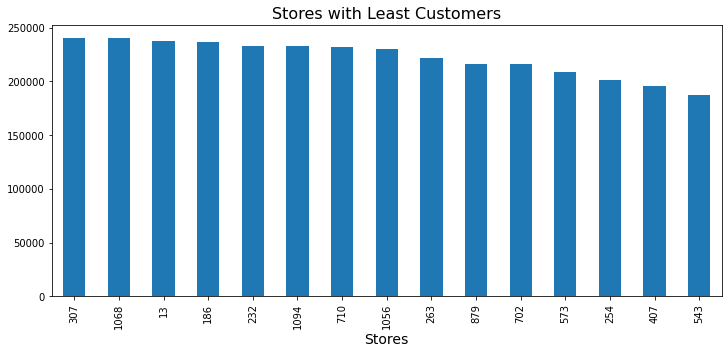

In [32]:
#plotting least customer arrival stores
least_stores = cust_stores.tail(15)
least_stores.plot(kind='bar', figsize=(12,5))
plt.title('Stores with Least Customers', size=16)
plt.xlabel('Stores', size=14)
plt.show()

**Importing Stores Data**

In [33]:
#loading the stores dataset
stores_df = pd.read_csv('/content/drive/MyDrive/Rossmann/store.csv')
stores_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [34]:
stores_df.shape

(1115, 10)

In [35]:
#information of the dataset showing the datatypes of features
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [36]:
#number of unique values in the whole dataset
stores_df.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

**Null Values**

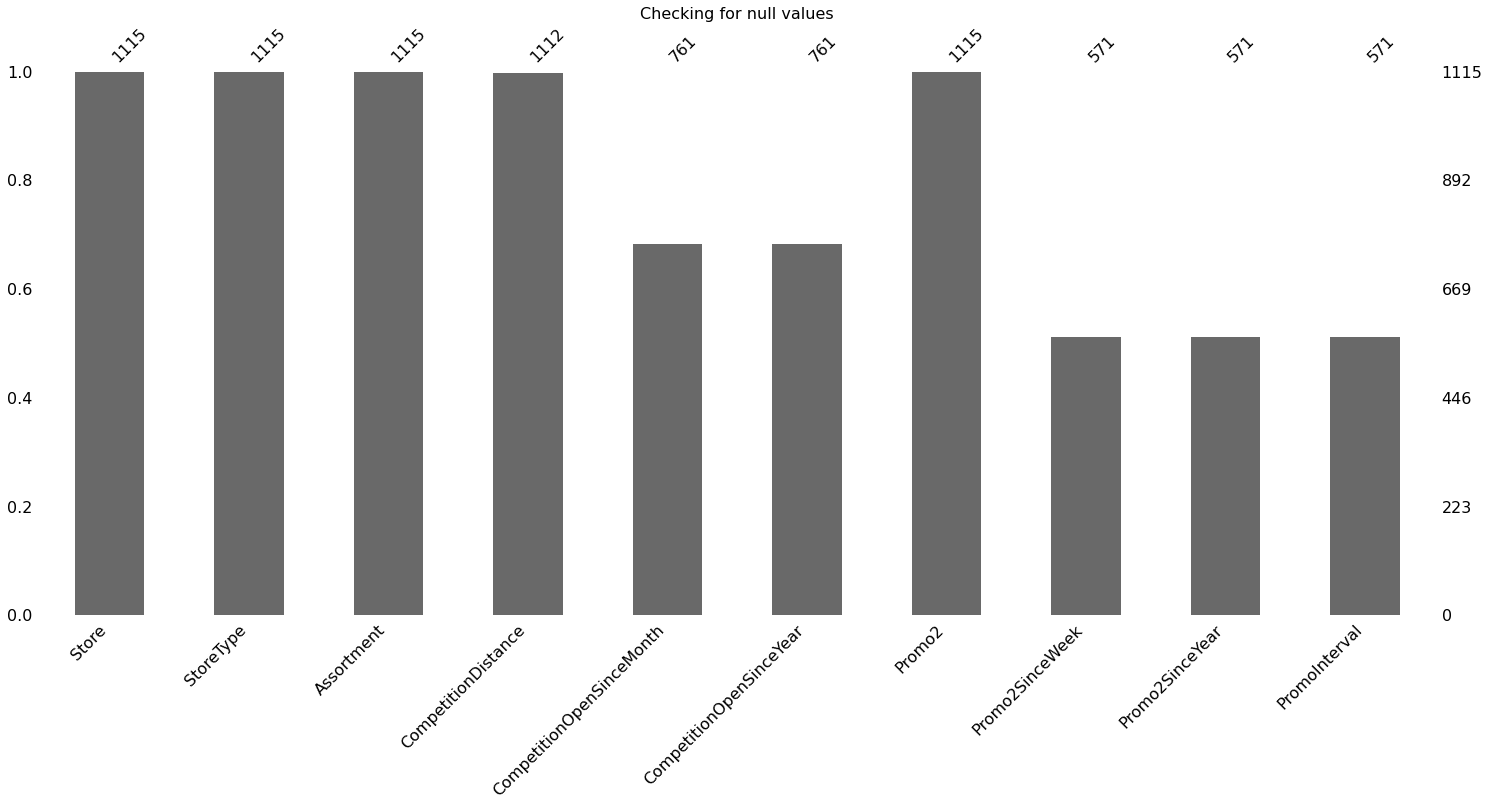

In [37]:
#Checking for null values
msno.bar(stores_df)
plt.title('Checking for null values', size=16)
plt.show()

* The above barplot shows the presence of NaN values in CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear and PromoInterval

**Dropping the columnsing containg the null values**

In [38]:
#dropping some columns from the stores dataset
stores_df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 
                'Promo2SinceYear', 'PromoInterval'], axis=1, inplace=True)

In [39]:
#filling the nan values in the competitiondistance feature
stores_df['CompetitionDistance'].fillna(0, inplace=True)

As the data set contains only one null value in Competition Distance Column filling it with 0.

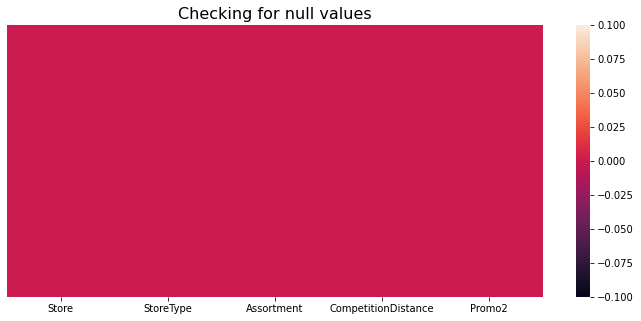

In [40]:
#Checking for null values
plt.figure(figsize=(12,5))
sns.heatmap(stores_df.isnull(), yticklabels=False)
plt.title('Checking for null values', size=16)
plt.show()

* All the nan values are cleaned

In [41]:
stores_df.head()

,Store,StoreType,Assortment,CompetitionDistance,Promo2
0,1,c,a,1270.0,0
1,2,a,a,570.0,1
2,3,a,a,14130.0,1
3,4,c,c,620.0,0
4,5,a,a,29910.0,0


**Merging the data frames**

In [42]:
#merging the two datasets
data = pd.merge(left=sales_df, right=stores_df, on='Store', how='left')
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,a,a,29910.0,0


* Stores and Sales datasets are merged and made a new data frame

In [43]:
#data frames after merging
data.shape

(843579, 16)

**Promo2 and its Value Counts**

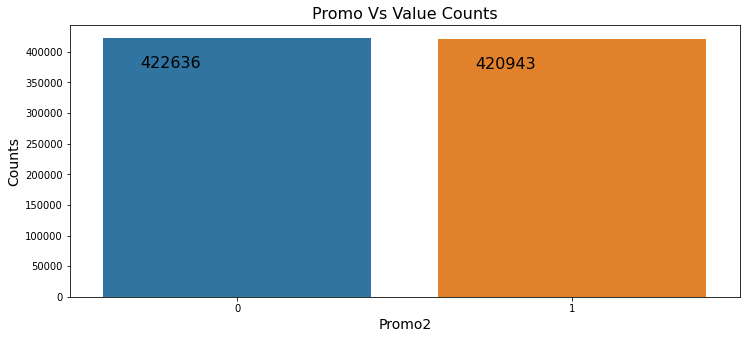

In [44]:
#plotting the value counts of promo2
plt.figure(figsize=(12,5))
ax = sns.countplot(data['Promo2'])
plt.title('Promo Vs Value Counts', size=16)
plt.ylabel('Counts', size=14)
plt.xlabel('Promo2', size=14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',  (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)

plt.show()

**Assortment Vs Value Counts**

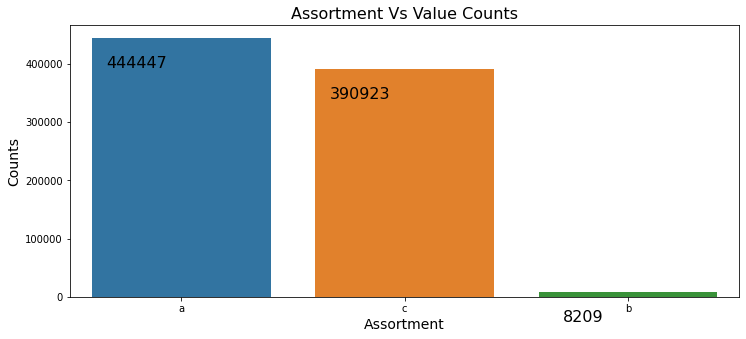

In [45]:
#plotting the value counts of Assortment
plt.figure(figsize=(12,5))
ax = sns.countplot(data['Assortment'])
plt.title('Assortment Vs Value Counts', size=16)
plt.ylabel('Counts', size=14)
plt.xlabel('Assortment', size=14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',  (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)

plt.show()

* Assortment type a (basic level) is having more counts

**Store Type Vs Value Counts**

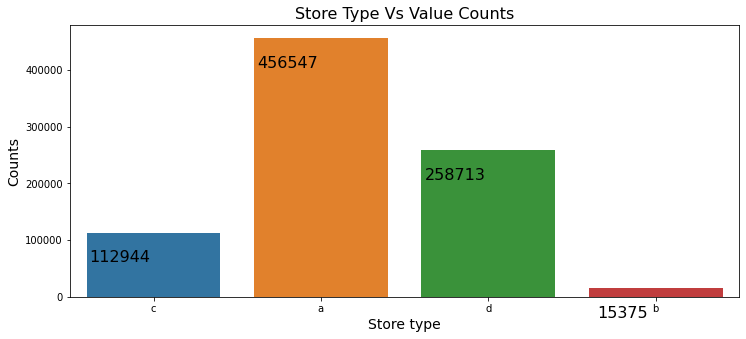

In [46]:
#plotting the value counts of storetype
plt.figure(figsize=(12,5))
ax = sns.countplot(data['StoreType'])
plt.title('Store Type Vs Value Counts', size=16)
plt.ylabel('Counts', size=14)
plt.xlabel('Store type', size=14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',  (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)

plt.show()

* Store type a is having more counts in the dataset

**Store type and average customers**

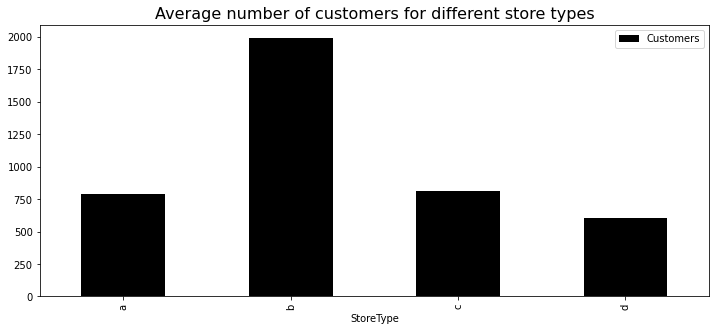

In [47]:
#claculating the average customer visits for different store type
stores_cust = data.groupby(['StoreType']).agg({'Customers':'mean'})

#plotting the data of average number of customers visits type of store
stores_cust.plot(kind='bar', figsize=(12,5), color='k')
plt.title('Average number of customers for different store types', size=16)
plt.show()

* store type b is having more customer visits

**Store Type and average Sales**

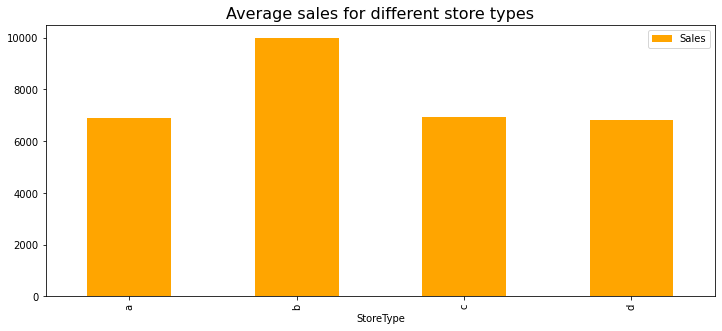

In [48]:
#finding the average sales for different store type
stores_sales = data.groupby(['StoreType']).agg({'Sales':'mean'})

#plotting the data of average number of customers visits in a day
stores_sales.plot(kind='bar', figsize=(12,5), color='orange')
plt.title('Average sales for different store types', size=16)
plt.show()

* we have high average sales from store b

**Sales on Promo2 Days**

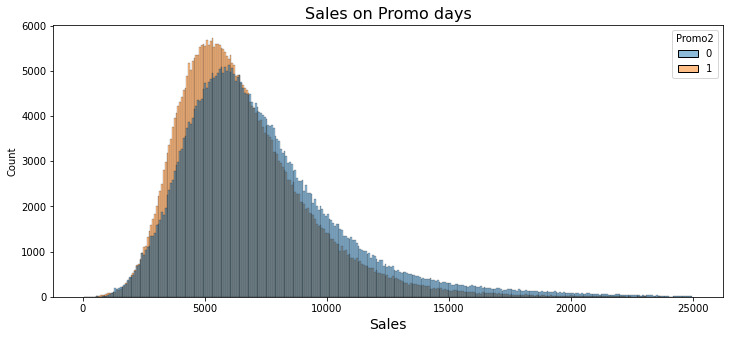

In [50]:
#plotting the data of sales on promo days
plt.figure(figsize=(12,5))
sns.histplot(hue='Promo2', x='Sales', data=data)
plt.title('Sales on Promo days', size=16)
plt.xlabel('Sales', size=14)
plt.show()

**Promo2 Vs Store Open statues**

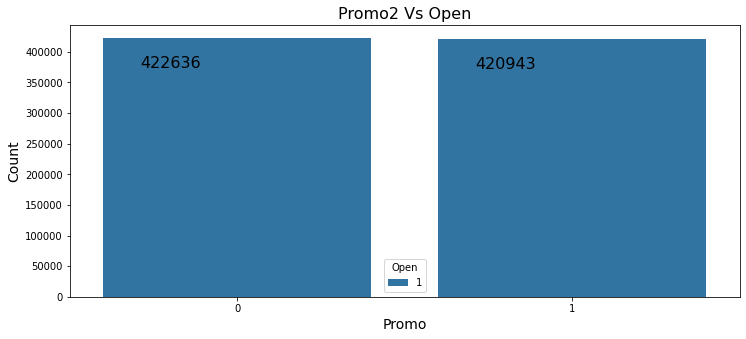

In [51]:
#plotting of store opening and clossing days during promo2
plt.figure(figsize=(12,5))
ax = sns.countplot(x='Promo2', hue='Open', data=data)
plt.title('Promo2 Vs Open', size=16)
plt.xlabel('Promo', size=14)
plt.ylabel('Count', size=14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',  (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)

plt.show()

**State Holiday Vs Store type**

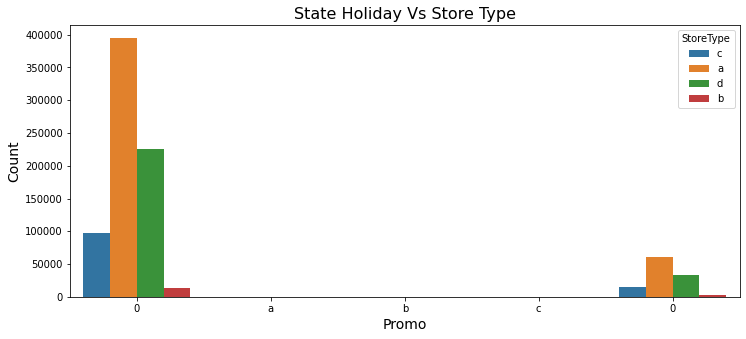

In [52]:
#plotting of store types and state holidays
plt.figure(figsize=(12,5))
sns.countplot(x='StateHoliday', hue='StoreType', data=data)
plt.title('State Holiday Vs Store Type', size=16)
plt.xlabel('Promo', size=14)
plt.ylabel('Count', size=14)
plt.show()

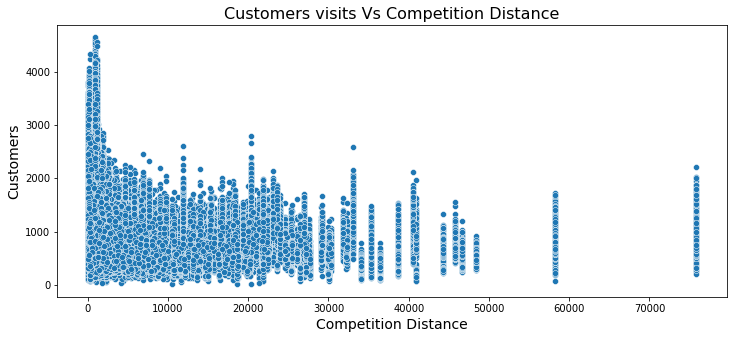

In [53]:
#scatterplot of customers and competition distance
plt.figure(figsize=(12,5))
sns.scatterplot(y='Customers', x='CompetitionDistance', data=data)
plt.title('Customers visits Vs Competition Distance', size=16)
plt.xlabel('Competition Distance', size=14)
plt.ylabel('Customers', size=14)
plt.show()

In [54]:
#description of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,843579.0,558.377596,321.743362,1.0,281.0,558.0,837.0,1115.0
DayOfWeek,843579.0,3.520636,1.723128,1.0,2.0,3.0,5.0,7.0
Sales,843579.0,6936.986820,3039.011516,46.0,4858.0,6366.0,8352.0,24990.0
Customers,843579.0,760.344596,392.077514,8.0,519.0,675.0,892.0,4645.0
Open,843579.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Promo,843579.0,0.446150,0.497092,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,843579.0,0.193580,0.395104,0.0,0.0,0.0,0.0,1.0
Year,843579.0,2013.832055,0.777281,2013.0,2013.0,2014.0,2014.0,2015.0
Month,843579.0,5.844307,3.323210,1.0,3.0,6.0,8.0,12.0
Day,843579.0,15.835465,8.682550,1.0,8.0,16.0,23.0,31.0


**Correlation Heatmap**

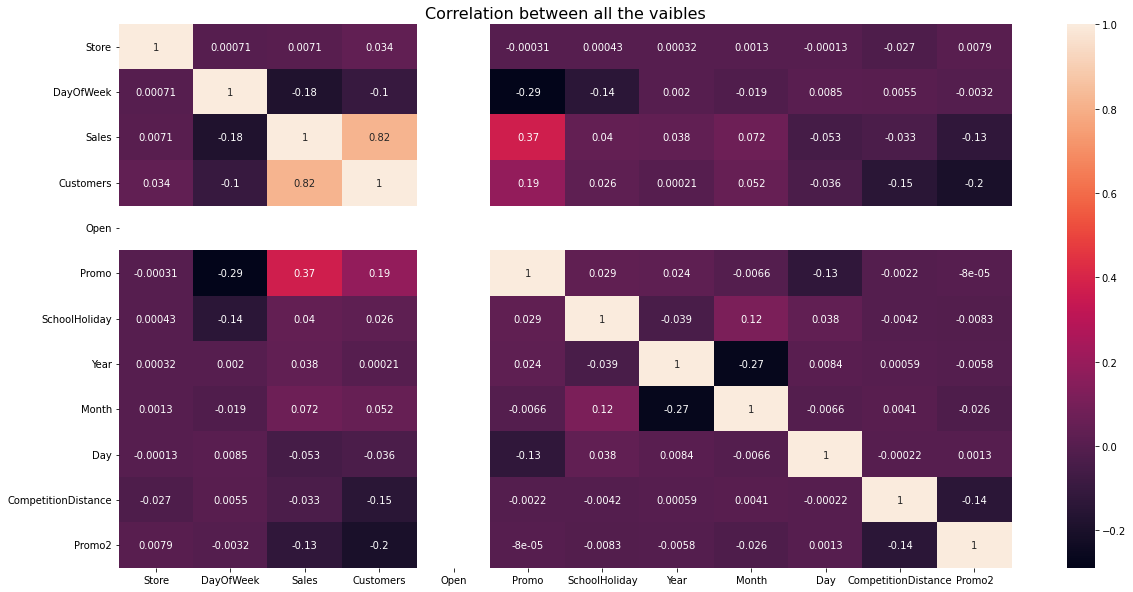

In [55]:
#visualization of the correlation in the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation between all the vaibles', size=16)
plt.show()

**Variance Inflation Factor**

In [56]:
#defining a function to calculate the variance inflation factor
def cal_vif(X):
    
    #creating a new dataframe
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

In [57]:
#finding the multicolinearity among the variables
cal_vif(data[[i for i in data.describe().columns if i not in ['Year', 'Month', 'Day', 'Date']]])

,variables,VIF
0,Store,1.003022
1,DayOfWeek,1.120318
2,Sales,3.713085
3,Customers,3.486380
4,Open,19.429400
5,Promo,1.294705
6,SchoolHoliday,1.020415
7,CompetitionDistance,1.087873
8,Promo2,1.087397


In [58]:
#information of the dataset showing the datatypes of all the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843579 entries, 0 to 843578
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Store                843579 non-null  int64         
 1   DayOfWeek            843579 non-null  int64         
 2   Date                 843579 non-null  datetime64[ns]
 3   Sales                843579 non-null  int64         
 4   Customers            843579 non-null  int64         
 5   Open                 843579 non-null  int64         
 6   Promo                843579 non-null  int64         
 7   StateHoliday         843579 non-null  object        
 8   SchoolHoliday        843579 non-null  int64         
 9   Year                 843579 non-null  int64         
 10  Month                843579 non-null  int64         
 11  Day                  843579 non-null  int64         
 12  StoreType            843579 non-null  object        
 13  Assortment    

**Onehot Ecoding**

In [59]:
#conversion of cateforical features
state_holiday = pd.get_dummies(data['StateHoliday'], drop_first=True)
store_type = pd.get_dummies(data['StoreType'], drop_first=True)
assortment = pd.get_dummies(data['Assortment'], drop_first=True)

* creating the dummy variables of the categorical features

In [60]:
#including the converted features by dropping the same as respective
data = pd.concat([data, state_holiday, store_type, assortment], axis=1)
data.drop(columns=['StateHoliday', 'StoreType', 'Assortment', 'Date'], inplace=True)
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,...,Promo2,0,a,b,c,b,c,d,b,c
0,1,5,5263,555,1,1,1,2015,7,31,...,0,1,0,0,0,0,1,0,0,0
1,2,5,6064,625,1,1,1,2015,7,31,...,1,1,0,0,0,0,0,0,0,0
2,3,5,8314,821,1,1,1,2015,7,31,...,1,1,0,0,0,0,0,0,0,0
3,4,5,13995,1498,1,1,1,2015,7,31,...,0,1,0,0,0,0,1,0,0,1
4,5,5,4822,559,1,1,1,2015,7,31,...,0,1,0,0,0,0,0,0,0,0


* dataframe after the one hot encoding

In [61]:
#defining dependent and independent variables
dependent_variable = 'Sales'
independent_variable = list(set(data.columns)-{dependent_variable})

In [62]:
#defining X and y varaibles 
y = data[dependent_variable]
X = data[independent_variable]

# **Data preparation**

In [63]:
#importing libraries required for the implementation of the model
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [64]:
#splitting train and test data sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
#size of train and test datasets
print(f'Size of X_train is: {X_train.shape}')
print(f'Size of X_test is: {X_test.shape}')
print(f'Size of y_train is: {y_train.shape}')
print(f'Size of y_test is: {y_test.shape}')

Size of X_train is: (674863, 20)
Size of X_test is: (168716, 20)
Size of y_train is: (674863,)
Size of y_test is: (168716,)


In [66]:
#scaling the data
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

**Model Implementation**

# **Linear Regression Model**

In [67]:
#Creating the Linear regression object
regressor = LinearRegression()
#Train the model using the training set
regressor.fit(x_train, y_train)

LinearRegression()

In [68]:
#linear regression scoe
regressor.score(x_train, y_train)

0.8214893216369955

In [69]:
#defining the predicted values 
pred_train = regressor.predict(x_train)
pred_test = regressor.predict(x_test)

**Model Evaluation**

In [70]:
#Evaluating the training dataset
#Mean Squared Error
MSE_train = mean_squared_error(y_train, pred_train)
print(f'MSE= {MSE_train}')

#Root Mean Squared Error
RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

#R2_Score
R2_Score_train = r2_score(y_train, pred_train)
print(f'R2_Score= {R2_Score_train}')

MSE= 1650861.0909707586
RMSE= 1284.8583933534305
R2_Score= 0.8214893216369955


In [71]:
#Evaluating the test dataset
#Mean Squared Error
MSE_test = mean_squared_error(y_test, pred_test)
print(f'MSE= {MSE_test}')

#Root Mean Squared Error
RMSE_test = np.sqrt(MSE_test)
print(f'RMSE= {RMSE_test}')

#R2_Score
R2_Score_test = r2_score(y_test, pred_test)
print(f'R2_Score= {R2_Score_test}')

MSE= 1642081.660857181
RMSE= 1281.437341760096
R2_Score= 0.8212413658395393


**Review**

* The Linear Regression model was implemented and evaluated with the metrics.

* We can see that there is no much difference between MSE values of training and test datasets, it means the model is trained, the predictions are with good accuracy and performing well.

* We have an accuracy of 82.15% on predicting the sales on training dataset and an accuracy of 82.12% on test dataset.

**Visualization of model output**

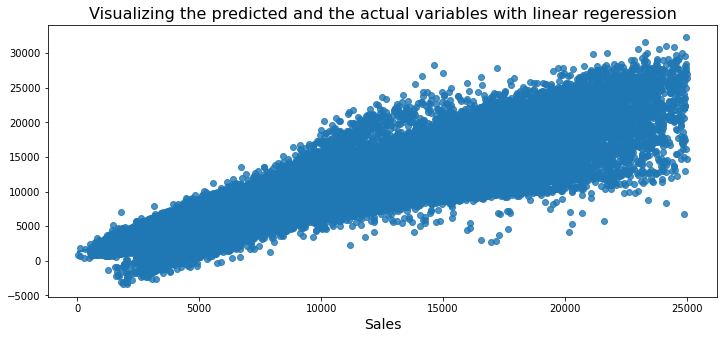

In [72]:
#plotting training dataset
plt.figure(figsize=(12, 5))
sns.regplot(y_train, pred_train)
plt.title('Visualizing the predicted and the actual variables with linear regeression', size=16)
plt.xlabel('Sales', size=14)
plt.show()

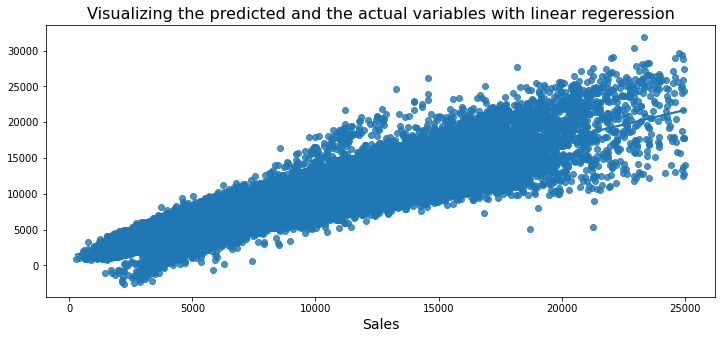

In [73]:
#ploting the testdataset
plt.figure(figsize=(12, 5))
sns.regplot(y_test, pred_test)
plt.title('Visualizing the predicted and the actual variables with linear regeression', size=16)
plt.xlabel('Sales', size=14)
plt.show()

# **Cross Validation on Linear Regression**

In [74]:
#libraries required for crossvalidation and hyperparameter tuning
from sklearn.model_selection import cross_validate 

In [75]:
#implmenting the cross validation on linear regression with 5 cv_datasets
scoring = ['r2']
scores = cross_validate(regressor, X_train, y_train, scoring=scoring, cv=5, 
                        return_train_score = True, return_estimator = True, verbose=10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ...................... r2: (train=0.822, test=0.821) total time=   0.5s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] END ...................... r2: (train=0.822, test=0.820) total time=   0.5s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV] END ...................... r2: (train=0.822, test=0.821) total time=   0.5s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s


[CV] END ...................... r2: (train=0.821, test=0.823) total time=   0.5s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s


[CV] END ...................... r2: (train=0.821, test=0.822) total time=   0.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.7s finished


In [76]:
#accuracy score of 5 cvs on training dataset
scores['train_r2']

array([0.82159357, 0.82185304, 0.82150841, 0.82113357, 0.82136528])

In [77]:
#accuracy score of 5 cvs on test dataset
scores['test_r2']

array([0.82106281, 0.820016  , 0.82139524, 0.82289854, 0.82197713])

**Remarks**

* Made a cross validation on the model with 5 cv and r2_score as the accuracy score of the model implemented.

* By using the cross validation we have seen that there is increase in the accuracy score of the train and test datasets.

# **Lasso Regression**

In [78]:
from sklearn.linear_model import Lasso

#implementing the model
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [79]:
lasso.score(X_train, y_train)

0.8214893216133158

In [80]:
#defining the predicted values 
pred_train = lasso.predict(X_train)
pred_test =  lasso.predict(X_test)

In [81]:
#Evaluating the training dataset
#Mean Squared Error
MSE_train = mean_squared_error(y_train, pred_train)
print(f'MSE= {MSE_train}')

#Root Mean Squared Error
RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

#R2_Score
R2_Score_train = r2_score(y_train, pred_train)
print(f'R2_Score= {R2_Score_train}')

MSE= 1650861.0911897477
RMSE= 1284.8583934386495
R2_Score= 0.8214893216133158


In [82]:
#Evaluating the test dataset
#Mean Squared Error
MSE_test = mean_squared_error(y_test, pred_test)
print(f'MSE= {MSE_test}')

#Root Mean Squared Error
RMSE_test = np.sqrt(MSE_test)
print(f'RMSE= {RMSE_test}')

#R2_Score
R2_Score_test = r2_score(y_test, pred_test)
print(f'R2_Score= {R2_Score_test}')

MSE= 1642081.489784682
RMSE= 1281.4372750098546
R2_Score= 0.8212413844626608


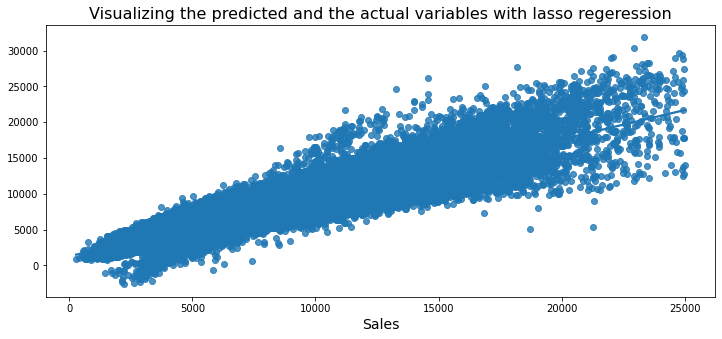

In [83]:
#ploting the testdataset
plt.figure(figsize=(12, 5))
sns.regplot(y_test, pred_test)
plt.title('Visualizing the predicted and the actual variables with lasso regeression', size=16)
plt.xlabel('Sales', size=14)
plt.show()

# **Random Forest Regression**

In [84]:
#libraries required for random forest model
from sklearn.ensemble import RandomForestRegressor 

In [85]:
#implementing the model
rf_reg = RandomForestRegressor(random_state=42)
#training the model
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [86]:
#defining the predicted variables
pred_train = rf_reg.predict(X_train)
pred_test = rf_reg.predict(X_test)

**Model Evaluation**

In [87]:
#Evaluating the training dataset
#Mean Squared Error
MSE_train = mean_squared_error(y_train, pred_train)
print(f'MSE= {MSE_train}')

#Root Mean Squared Error
RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

#R2_Score
R2_Score_train = r2_score(y_train, pred_train)
print(f'R2_Score= {R2_Score_train}')

MSE= 32998.56447704763
RMSE= 181.65507005599272
R2_Score= 0.9964318038858501


In [88]:
#Evaluating the test dataset
#Mean Squared Error
MSE_test = mean_squared_error(y_test, pred_test)
print(f'MSE= {MSE_test}')

#Root Mean Squared Error
RMSE_test = np.sqrt(MSE_test)
print(f'RMSE= {RMSE_test}')

#R2_Score
R2_Score_test = r2_score(y_test, pred_test)
print(f'R2_Score= {R2_Score_test}')

MSE= 226941.2677864838
RMSE= 476.3835301377282
R2_Score= 0.9752949490691112


**Review**

* The Ranmdom Forest Regression model was implemented and evaluated with the metrics

* We can see from the plotting of output that the model is trained well and is fit good with the training dataset

* We have an accuracy of 99.64% on predicting the sales on training dataset and an accuracy of 97.53% on test dataset.

**Visualization of model output**

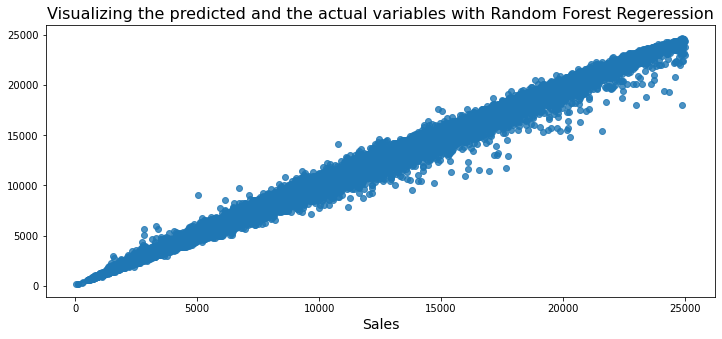

In [89]:
#ploting the outputs
plt.figure(figsize=(12, 5))
sns.regplot(y_train, pred_train)
plt.title('Visualizing the predicted and the actual variables with Random Forest Regeression', size=16)
plt.xlabel('Sales', size=14)
plt.show()

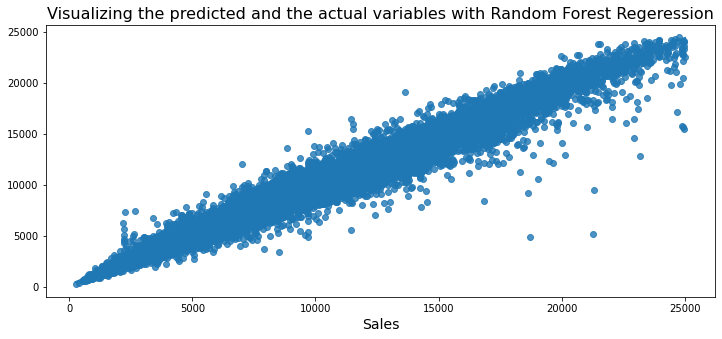

In [90]:
#ploting the outputs
plt.figure(figsize=(12, 5))
sns.regplot(y_test, pred_test)
plt.title('Visualizing the predicted and the actual variables with Random Forest Regeression', size=16)
plt.xlabel('Sales', size=14)
plt.show()

In [91]:
rf_reg.feature_importances_ 

array([7.34582928e-01, 6.95812833e-03, 3.84998104e-05, 1.30118997e-02,
       1.84705404e-02, 7.23530724e-03, 2.28445403e-05, 3.56629498e-03,
       5.21166423e-03, 4.49442737e-04, 8.77396145e-04, 6.32118889e-02,
       0.00000000e+00, 8.22906359e-03, 1.10499459e-02, 3.18233977e-03,
       1.35184603e-04, 4.62227576e-02, 4.35828604e-02, 3.39610134e-02])

In [92]:
importances = rf_reg.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [93]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
importance_df

,Feature,Feature Importance
0,Customers,0.73
1,Month,0.01
2,b,0.00
3,b,0.01
4,b,0.02
5,Day,0.01
6,c,0.00
7,c,0.00
8,c,0.01
9,0,0.00


In [94]:
importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
importance_df

,Feature,Feature Importance
0,Customers,0.73
11,CompetitionDistance,0.06
17,d,0.05
18,Store,0.04
19,Promo,0.03
4,b,0.02
5,Day,0.01
8,c,0.01
1,Month,0.01
13,Promo2,0.01


**Hyperparameter Tuning**

In [95]:
# Number of trees
n_estimators = [100,120]

# Maximum depth of trees
max_depth = [5,8,10]

# Minimum number of samples required to split a node
min_samples_split = [50,80]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]


# HYperparameter Grid
params = {'n_estimators' : n_estimators,
          'max_depth' : max_depth,
          'min_samples_split' : min_samples_split,
          'min_samples_leaf' : min_samples_leaf}

In [96]:
from sklearn.model_selection import GridSearchCV

# Grid search
rf_reg_grid = GridSearchCV(estimator=rf_reg,param_grid = params,cv = 3, verbose=2,scoring="r2")

rf_reg_grid.fit(X_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time= 1.4min
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time= 1.4min
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time= 1.4min
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=120; total time= 1.7min
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=120; total time= 1.7min
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=120; total time= 1.7min
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=80, n_estimators=100; total time= 1.5min
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=80, n_estimators=100; total time= 1.5min
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=80, n_estimators=100; total time= 1.5min
[CV] END max_depth=5,

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 8, 10], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 80],
                         'n_estimators': [100, 120]},
             scoring='r2', verbose=2)

In [97]:
print(rf_reg_grid.best_score_)

print(rf_reg_grid.best_params_)

0.8923946756574409
{'max_depth': 10, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 120}


In [98]:
rf_reg_optimal = rf_reg_grid.best_estimator_

#defining the predicted variables
pred_train = rf_reg_optimal.predict(X_train)
pred_test = rf_reg_optimal.predict(X_test)

In [99]:
#Evaluating the training dataset
#Mean Squared Error
MSE_train = mean_squared_error(y_train, pred_train)
print(f'MSE= {MSE_train}')

#Root Mean Squared Error
RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

#R2_Score
R2_Score_train = r2_score(y_train, pred_train)
print(f'R2_Score= {R2_Score_train}')

MSE= 971663.7292241853
RMSE= 985.7300488593139
R2_Score= 0.8949321948447276


In [100]:
#Evaluating the test dataset
#Mean Squared Error
MSE_test = mean_squared_error(y_test, pred_test)
print(f'MSE= {MSE_test}')

#Root Mean Squared Error
RMSE_test = np.sqrt(MSE_test)
print(f'RMSE= {RMSE_test}')

#R2_Score
R2_Score_test = r2_score(y_test, pred_test)
print(f'R2_Score= {R2_Score_test}')

MSE= 977668.4913968289
RMSE= 988.7712027546256
R2_Score= 0.8935700407904285


**Conclusion**

*	Even though the dataset contains more records of the year 2013, 2015 is having more sales among the years.

*	In the months of March, July and December we have high sales in those 4 month period. In all over months we have maximum sales in the month of December.

*	84% of the data belongs to stores are open. It is assumed that 7 in the day of week as the Sunday and stores are mostly closed during Sundays. And the stores which are opened on Sundays are also having the least number of customer visits during Sundays.

*	Sales are highly correlated with the customers.

*	The working days of the stores are less in 2015. It is assumed that we have less records from the year 2015.

*	All schools are closed on public holidays and weekends.

*	We have more customers in the range of 0 to 2000 with the sales range of 0 to 10000. This means their purchase index lies between 0 and 10000.

*	Store number 733 is the having the highest number of customer visit and store number 543 has the least.

*	Even though the above mentioned stores are having the most customer visits, store number 262 is the having the highest sales and store number 307 has the least sales.

*	Even though store type ‘a’ is having more value counts in the dataset, store type b is having the more number of customer visits and sales.

*	We have the competitor stores mostly in the range of 0 to 30000 meters of distance  and there is diversion of customers from our stores.

*	Linear Regression and Random Forest Regression are used to train the model.

*	As per the evaluation it is better to implement the Random Forest Regression rather that going for Linear Regression. 

*	When it comes to the accuracy the Random Forest Regression is performing well on the test dataset with the accuracy of 97.53%. As it can predict the daily sales of stores for up to six weeks in advance with the same accuracy.

